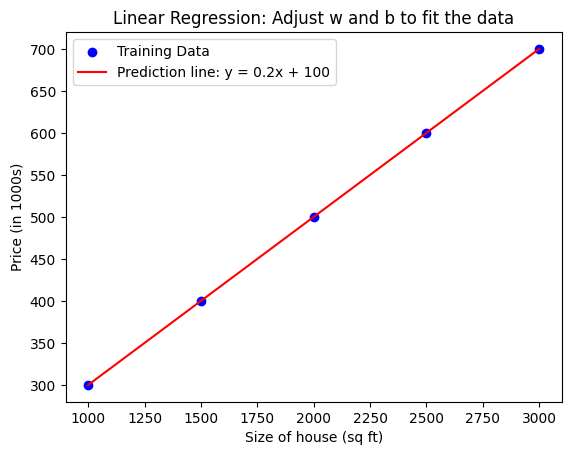

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define your training input features (e.g., house sizes) and output targets (e.g., prices)
x_train = np.array([1000, 1500, 2000, 2500, 3000])
y_train = np.array([300, 400, 500, 600, 700])

# Define the linear function
def f(x, w, b):
    return w * x + b

# Try different values for w (slope) and b (intercept)
w = 0.2  # Slope (You can change this value)
b = 100  # Intercept (You can change this value)

# Compute predictions for the training data
y_pred = f(x_train, w, b)

# Plot training data
plt.scatter(x_train, y_train, color='blue', label='Training Data')

# Plot the straight line
plt.plot(x_train, y_pred, color='red', label=f'Prediction line: y = {w}x + {b}')

plt.xlabel('Size of house (sq ft)')
plt.ylabel('Price (in 1000s)')
plt.title('Linear Regression: Adjust w and b to fit the data')
plt.legend()
plt.show()


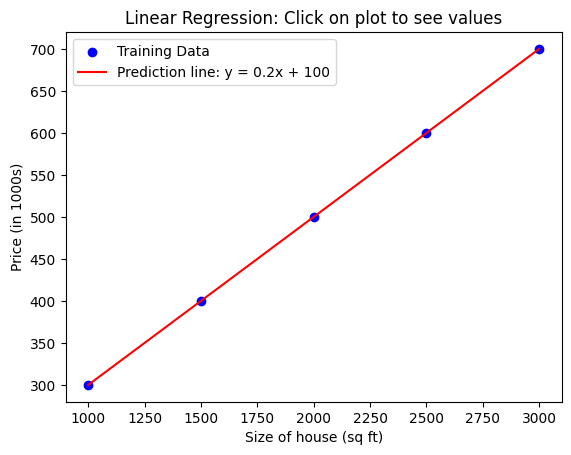

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Training data: house sizes (x) and prices (y)
x_train = np.array([1000, 1500, 2000, 2500, 3000])
y_train = np.array([300, 400, 500, 600, 700])

# Linear regression function: y = w * x + b (adjust w and b for exploration)
w, b = 0.2, 100
def f(x): return w * x + b

# Plot the training data and the model prediction
fig, ax = plt.subplots()
ax.scatter(x_train, y_train, color='blue', label='Training Data')
ax.plot(x_train, f(x_train), color='red', label=f'Prediction line: y = {w}x + {b}')
ax.set_xlabel('Size of house (sq ft)')
ax.set_ylabel('Price (in 1000s)')
ax.set_title('Linear Regression: Click on plot to see values')
ax.legend()

# Prepare annotation (initially hidden)
annot = ax.annotate("", xy=(0,0), xytext=(20,20), textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

# Event handler for mouse clicks
def on_click(event):
    if event.inaxes == ax:
        # Find nearest training point
        x_click, y_click = event.xdata, event.ydata
        distances = np.sqrt((x_train - x_click)**2 + (y_train - y_click)**2)
        nearest = distances.argmin()
        annot.xy = (x_train[nearest], y_train[nearest])
        text = f"Size: {x_train[nearest]} sq ft\nPrice: {y_train[nearest]} (1000s)"
        annot.set_text(text)
        annot.set_visible(True)
        fig.canvas.draw_idle()

# Connect the click event
fig.canvas.mpl_connect('button_press_event', on_click)
plt.show()


In [1]:
import numpy as np
import time

# Initialize random vectors
w = np.random.rand(16)
d = np.random.rand(16)
learning_rate = 0.1

# 1. Update weights with a for-loop (unvectorized)
w_loop = w.copy()
start = time.time()
for j in range(len(w_loop)):
    w_loop[j] = w_loop[j] - learning_rate * d[j]
end = time.time()
print("For-loop update time:", end - start)

# 2. Update weights with vectorized operation (NumPy)
w_vec = w.copy()
start = time.time()
w_vec = w_vec - learning_rate * d
end = time.time()
print("Vectorized update time:", end - start)

# 3. Check equivalence
print("Are result arrays equal?", np.allclose(w_loop, w_vec))

# 4. Dot product example (classic loop)
x = np.random.rand(16)
w = np.random.rand(16)
start = time.time()
dot_loop = 0
for j in range(16):
    dot_loop += w[j] * x[j]
end = time.time()
print("Loop dot product:", dot_loop, "Time:", end - start)

# 5. Dot product example (vectorized)
start = time.time()
dot_vec = np.dot(w, x)
end = time.time()
print("Vectorized dot product:", dot_vec, "Time:", end - start)


For-loop update time: 0.0001308917999267578
Vectorized update time: 9.179115295410156e-05
Are result arrays equal? True
Loop dot product: 5.438868331143583 Time: 0.0001785755157470703
Vectorized dot product: 5.438868331143585 Time: 0.00011348724365234375
